In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import cv2

# with tf.device('/GPU:0'):

In [21]:
root_dir = "./"
data_dir = root_dir + "dataset/fruits-360/"
# fruit_models_dir = root_dir + ’\\ fruit_models \\’
# labels_file = root_dir + ’\\ utils \\ labels ’

training_images_dir =  data_dir + "Training/"
test_images_dir = data_dir + "Test/"
training_images_dir

'./dataset/fruits-360/Training/'

In [3]:
# Load an color image in grayscale
img = cv2.imread(training_images_dir + "Apple Braeburn/0_100.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) # RGB colorisation


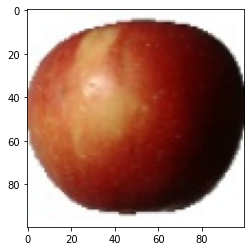

In [4]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(img_rgb)

In [13]:
def list_folders(startpath):
    """Print the folder sutructure of a given folder"""
    
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        
# def list_folders(startpath):
#     """Print the folder sutructure of a given folder"""
    
#     for root, dirs, files in os.walk(startpath):
#         level = root.replace(startpath, '').count(os.sep)
#         indent = ' ' * 4 * (level)
#         print('{}["{}"],'.format(indent, os.path.basename(root)))

In [14]:
list_folders(training_images_dir)

Training/
    Apple Braeburn/
    Apple Crimson Snow/
    Apple Golden 1/
    Apple Golden 2/
    Apple Golden 3/
    Apple Granny Smith/
    Apple Pink Lady/
    Apple Red 1/
    Apple Red 2/
    Apple Red 3/
    Apple Red Delicious/
    Apple Red Yellow 1/
    Apple Red Yellow 2/
    Apricot/
    Avocado/
    Avocado ripe/
    Banana/
    Banana Lady Finger/
    Banana Red/
    Beetroot/
    Blueberry/
    Cactus fruit/
    Cantaloupe 1/
    Cantaloupe 2/
    Carambula/
    Cauliflower/
    Cherry 1/
    Cherry 2/
    Cherry Rainier/
    Cherry Wax Black/
    Cherry Wax Red/
    Cherry Wax Yellow/
    Chestnut/
    Clementine/
    Cocos/
    Corn/
    Corn Husk/
    Cucumber Ripe/
    Cucumber Ripe 2/
    Dates/
    Eggplant/
    Fig/
    Ginger Root/
    Granadilla/
    Grape Blue/
    Grape Pink/
    Grape White/
    Grape White 2/
    Grape White 3/
    Grape White 4/
    Grapefruit Pink/
    Grapefruit White/
    Guava/
    Hazelnut/
    Huckleberry/
    Kaki/
    Kiwi/
    Kohlr

In [15]:
categories = [
    ["Apple Braeburn"],
    ["Apple Crimson Snow"],
    ["Apple Golden 1"],
    ["Apple Golden 2"],
    ["Apple Golden 3"],
    ["Apple Granny Smith"],
    ["Apple Pink Lady"],
    ["Apple Red 1"],
    ["Apple Red 2"],
    ["Apple Red 3"],
    ["Apple Red Delicious"],
    ["Apple Red Yellow 1"],
    ["Apple Red Yellow 2"],
    ["Apricot"],
    ["Avocado"],
    ["Avocado ripe"],
    ["Banana"],
    ["Banana Lady Finger"],
    ["Banana Red"],
    ["Beetroot"],
    ["Blueberry"],
    ["Cactus fruit"],
    ["Cantaloupe 1"],
    ["Cantaloupe 2"],
    ["Carambula"],
    ["Cauliflower"],
    ["Cherry 1"],
    ["Cherry 2"],
    ["Cherry Rainier"],
    ["Cherry Wax Black"],
    ["Cherry Wax Red"],
    ["Cherry Wax Yellow"],
    ["Chestnut"],
    ["Clementine"],
    ["Cocos"],
    ["Corn"],
    ["Corn Husk"],
    ["Cucumber Ripe"],
    ["Cucumber Ripe 2"],
    ["Dates"],
    ["Eggplant"],
    ["Fig"],
    ["Ginger Root"],
    ["Granadilla"],
    ["Grape Blue"],
    ["Grape Pink"],
    ["Grape White"],
    ["Grape White 2"],
    ["Grape White 3"],
    ["Grape White 4"],
    ["Grapefruit Pink"],
    ["Grapefruit White"],
    ["Guava"],
    ["Hazelnut"],
    ["Huckleberry"],
    ["Kaki"],
    ["Kiwi"],
    ["Kohlrabi"],
    ["Kumquats"],
    ["Lemon"],
    ["Lemon Meyer"],
    ["Limes"],
    ["Lychee"],
    ["Mandarine"],
    ["Mango"],
    ["Mango Red"],
    ["Mangostan"],
    ["Maracuja"],
    ["Melon Piel de Sapo"],
    ["Mulberry"],
    ["Nectarine"],
    ["Nectarine Flat"],
    ["Nut Forest"],
    ["Nut Pecan"],
    ["Onion Red"],
    ["Onion Red Peeled"],
    ["Onion White"],
    ["Orange"],
    ["Papaya"],
    ["Passion Fruit"],
    ["Peach"],
    ["Peach 2"],
    ["Peach Flat"],
    ["Pear"],
    ["Pear 2"],
    ["Pear Abate"],
    ["Pear Forelle"],
    ["Pear Kaiser"],
    ["Pear Monster"],
    ["Pear Red"],
    ["Pear Stone"],
    ["Pear Williams"],
    ["Pepino"],
    ["Pepper Green"],
    ["Pepper Orange"],
    ["Pepper Red"],
    ["Pepper Yellow"],
    ["Physalis"],
    ["Physalis with Husk"],
    ["Pineapple"],
    ["Pineapple Mini"],
    ["Pitahaya Red"],
    ["Plum"],
    ["Plum 2"],
    ["Plum 3"],
    ["Pomegranate"],
    ["Pomelo Sweetie"],
    ["Potato Red"],
    ["Potato Red Washed"],
    ["Potato Sweet"],
    ["Potato White"],
    ["Quince"],
    ["Rambutan"],
    ["Raspberry"],
    ["Redcurrant"],
    ["Salak"],
    ["Strawberry"],
    ["Strawberry Wedge"],
    ["Tamarillo"],
    ["Tangelo"],
    ["Tomato 1"],
    ["Tomato 2"],
    ["Tomato 3"],
    ["Tomato 4"],
    ["Tomato Cherry Red"],
    ["Tomato Heart"],
    ["Tomato Maroon"],
    ["Tomato not Ripened"],
    ["Tomato Yellow"],
    ["Walnut"],
    ["Watermelon"],
]

In [30]:
big_np_array = []

for i in range(len(categories)):
    print(((i + 1) / (len(categories)) * 100))
    for elem in os.listdir(training_images_dir + categories[i][0]):
        
        img = cv2.imread(training_images_dir+categories[i][0]+ "/" + elem)
        # print(training_images_dir+categories[i][0] + "/"+ elem)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) # RGB colorisationprint(elem)
        big_np_array.append(img_rgb)

0.7633587786259541
1.5267175572519083
2.2900763358778624
3.0534351145038165
3.816793893129771
4.580152671755725
5.343511450381679
6.106870229007633
6.870229007633588
7.633587786259542
8.396946564885496
9.16030534351145
9.923664122137405
10.687022900763358
11.450381679389313
12.213740458015266
12.977099236641221
13.740458015267176
14.50381679389313
15.267175572519085
16.030534351145036
16.793893129770993
17.557251908396946
18.3206106870229
19.083969465648856
19.84732824427481
20.610687022900763
21.374045801526716
22.137404580152673
22.900763358778626
23.66412213740458
24.427480916030532
25.190839694656486
25.954198473282442
26.717557251908396
27.480916030534353
28.24427480916031
29.00763358778626
29.770992366412212
30.53435114503817
31.297709923664126
32.06106870229007
32.82442748091603
33.587786259541986
34.35114503816794
35.11450381679389
35.87786259541985
36.6412213740458
37.404580152671755
38.16793893129771
38.93129770992366
39.69465648854962
40.458015267175576
41.221374045801525
41

In [50]:
# import random
# r = random.randint(1,len(big_np_array) )
# plt.imshow(big_np_array[r])
# print(len(big_np_array))

In [47]:
x_train = np.asarray(big_np_array)

67692


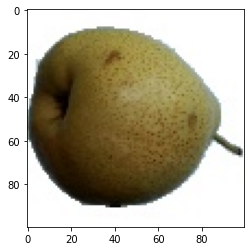

In [52]:
import random
r = random.randint(1,len(big_np_array) )
plt.imshow(x_train[r])
print(len(x_train))